# Project – data analysis and preparation

In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import turicreate as tc

In [2]:
# 1) In a markdown cell, briefly state your use case. Discuss whether false positives or false negatives for one of 
# the classes are to be avoided. Which metrics will be most useful in comparing different models?

**Explanation:**

My use case is whether an individual has heart disease based on a number of characteristics. A false positive (FP) would be when the label is negative (or zero), and the prediction is positive (or one), in other words, the model predicted that the individual has heart disease, when they do not. A false negative (FN) would be the opposite of that - the person has heart disease, but the model predicted that they do not.

In my use case, a false negative would be worse because that individual would be released from the care of a professional, when they in fact need medical attention and care. With a false positive, they would just stay in the care of a medical professional for a little while. 

The metrics that would be most useful are recall and F2-score.

In [3]:
# Here is the markdown cell again if the markdown isn't visible:

# My use case is whether an individual has heart disease based on a number of characteristics. 
# A false positive (FP) would be when the label is negative (or zero), and the prediction is positive (or one), in other words, 
# the model predicted that the individual has heart disease, when they do not. A false negative (FN) would be the opposite of 
# that - the person has heart disease, but the model predicted that they do not.

# In my use case, a false negative would be worse because that individual would be released from the care of a professional, when they in fact 
# need medical attention and care. With a false positive, they would just stay in the care of a medical professional for a little while.

# The metrics that would be most useful are ...

In [4]:
# 2) Clean the data.
#  · Use Pandas to check for null values and duplicates; deal with those cases appropriately. 
#    Then, use Pandas to show that no null values or duplicates remain.
#  · If you have text data, use the RE library to clean the text and standardize the case. Also remove stopwords if applicable.


# Load dataset
data = pd.read_excel('Cardiovascular_Disease_Dataset.xlsx')

# Check for nulls as duplicates
print(data.isnull().sum())
print(data.duplicated().sum())

# Deal with them appropritely
data = data.dropna()
data = data.drop_duplicates()

# Show no nulls or duplicates remain
print('Null values:', data.isnull().sum())
print('Duplicate values:', data.duplicated().sum())

ID                        0
Age                       0
Gender                    0
Height                    0
Weight                    0
Systolic BP               0
Diastolic BP              0
Cholesterol               0
Glucose                   0
Smoking                   0
Alcohol Intake            0
Physical Activity         0
Target - Heart Disease    0
dtype: int64
0
Null values: ID                        0
Age                       0
Gender                    0
Height                    0
Weight                    0
Systolic BP               0
Diastolic BP              0
Cholesterol               0
Glucose                   0
Smoking                   0
Alcohol Intake            0
Physical Activity         0
Target - Heart Disease    0
dtype: int64
Duplicate values: 0


In [5]:
# 3) Describe the data.
#  · Use the Pandas describe function to find statistics about your data.
#  · If you have tabular numerical data, find and display the Pearson correlation coefficient between each pair of 
#    columns (including the label). You can use the corr function with a Pandas dataframe but may use another method if you like.
#  · If you have text data, find the correlation between the label and the text sample length (number of words or characters, whichever is appropriate).

print(data.describe())

                 ID           Age        Gender        Height        Weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

        Systolic BP  Diastolic BP   Cholesterol       Glucose       Smoking  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250    

In [6]:
# Tabular numerical data found - using a sample because the system is running out of memory
sampled_data = data.sample(n=1000)

print("Pearson's Coefficient: Id-Age", np.corrcoef(sampled_data)[0, 1])
print("Pearson's Coefficient: Age-Gender", np.corrcoef(sampled_data)[1, 2])
print("Pearson's Coefficient: Gender-Height", np.corrcoef(sampled_data)[2, 3])
print("Pearson's Coefficient: Height-Weight", np.corrcoef(sampled_data)[3, 4])
print("Pearson's Coefficient: Weight-Systolic BP", np.corrcoef(sampled_data)[4, 5])
print("Pearson's Coefficient: Systolic BP-Diastolic BP", np.corrcoef(sampled_data)[5, 6])
print("Pearson's Coefficient: Diastolic BP-Cholesterol", np.corrcoef(sampled_data)[6, 7])
print("Pearson's Coefficient: Cholesterol-Glucose", np.corrcoef(sampled_data)[7, 8])
print("Pearson's Coefficient: Glucose-Smoking", np.corrcoef(sampled_data)[8, 9])
print("Pearson's Coefficient: Smoking-Alcohol Intake", np.corrcoef(sampled_data)[9, 10])
print("Pearson's Coefficient: Alcohol-Physical Activity", np.corrcoef(sampled_data)[10, 11])
print("Pearson's Coefficient: Activity-Target", np.corrcoef(sampled_data)[11, 12])

Pearson's Coefficient: Id-Age 0.5930239309990597
Pearson's Coefficient: Age-Gender 0.9546812257457588
Pearson's Coefficient: Gender-Height 0.8223301576845992
Pearson's Coefficient: Height-Weight 0.8872740390312506
Pearson's Coefficient: Weight-Systolic BP 0.9628413509792634
Pearson's Coefficient: Systolic BP-Diastolic BP 0.8205797233535045
Pearson's Coefficient: Diastolic BP-Cholesterol 0.8962909452209274
Pearson's Coefficient: Cholesterol-Glucose 0.9998932963844545
Pearson's Coefficient: Glucose-Smoking 0.9794496059865287
Pearson's Coefficient: Smoking-Alcohol Intake 0.7373225424272555
Pearson's Coefficient: Alcohol-Physical Activity 0.7862395601585883
Pearson's Coefficient: Activity-Target 0.995091369008246


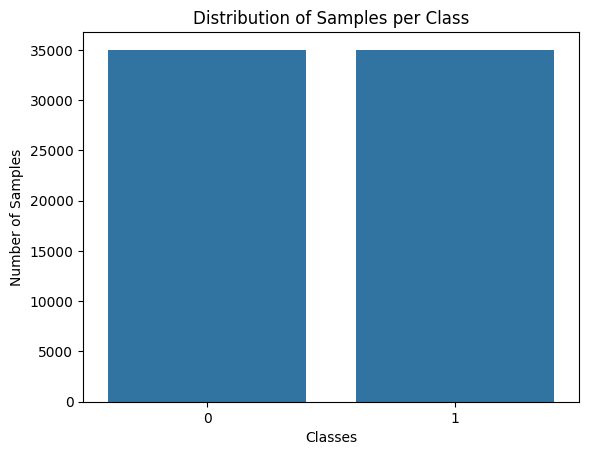

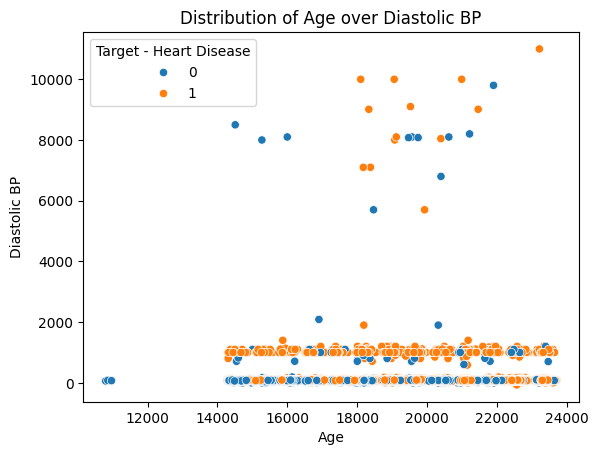

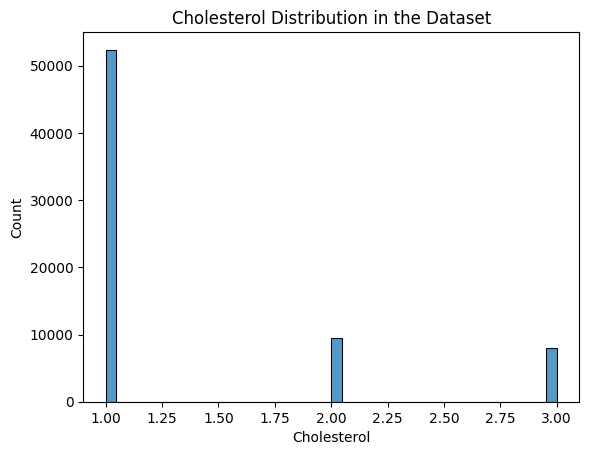

In [7]:
# 4) Create visualizations.
#  · Create a bar plot showing the number of samples in each class.
#  · If you have text data, create a histogram showing the distribution of text sample length.
#  · If you have tabular, use Seaborn pairplot to create scatter plots and histograms from your data.

target_count = data['Target - Heart Disease'].value_counts()

# Bar Plot:
sns.barplot(x=target_count.index, y=target_count.values)
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples per Class')
plt.show()

# Scatter Plot
sns.scatterplot(x="Age", y="Diastolic BP", data=data, hue="Target - Heart Disease")
plt.title('Distribution of Age over Diastolic BP')
plt.show()

# Histogram
sns.histplot(data=data, x="Cholesterol")
plt.title('Cholesterol Distribution in the Dataset')
plt.show()

In [8]:
# 5) Prepare data to be used as input.
#  · If you have categorical features, use sklearn to one-hot encode them.
#  · Split the data into training/validation/testing sets. 
#    Use the sklearn function train_test_split() with the parameter ‘stratify’ set to the label column.
#  · If you have text data, fit an sklearn CountVectorizer on the training data. You can use another vectorizer (e.g. TfidfVectorizer) 
#    if you wish but be prepared to explain what it does during evaluation in week 15. Use the vectorizer to transform the training, 
#    validation, and testing sets. It is important that we 

id = np.array(data['ID'])
age = np.array(data['Age'])
gender = np.array(data['Gender'])
height = np.array(data['Height'])
weight = np.array(data['Weight'])
systolic = np.array(data['Systolic BP'])
diastolic = np.array(data['Diastolic BP'])
cholesterol = np.array(data['Cholesterol'])
glucose = np.array(data['Glucose'])
smoking = np.array(data['Smoking'])
alcohol = np.array(data['Alcohol Intake'])
activity = np.array(data['Physical Activity'])

condition = np.array(data['Target - Heart Disease'])
features = np.column_stack((id, age, gender, height, weight, systolic, diastolic, cholesterol, glucose, smoking, alcohol, activity))

x_train, x_valtest, y_train, y_valtest = train_test_split(features, condition, stratify=condition)
x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest)


train_data = tc.SFrame({'ID': x_train[:, 0], 'Age': x_train[:, 1], 'Gender': x_train[:, 2], 'Height': x_train[:, 3], 'Weight': x_train[:, 4], 
                        'Systolic': x_train[:, 5], 'Diastolic': x_train[:, 6], 'Cholesterol': x_train[:, 7], 'Glucose': x_train[:, 8], 
                        'Smoking': x_train[:, 9], 'Alcohol': x_train[:, 10], 'Activity': x_train[:, 11], 'Condition': y_train})

val_data = tc.SFrame({'ID': x_val[:, 0], 'Age': x_val[:, 1], 'Gender': x_val[:, 2], 'Height': x_val[:, 3], 'Weight': x_val[:, 4], 
                        'Systolic': x_val[:, 5], 'Diastolic': x_val[:, 6], 'Cholesterol': x_val[:, 7], 'Glucose': x_val[:, 8], 
                        'Smoking': x_val[:, 9], 'Alcohol': x_val[:, 10], 'Activity': x_val[:, 11], 'Condition': y_val})

test_data = tc.SFrame({'ID': x_test[:, 0], 'Age': x_test[:, 1], 'Gender': x_test[:, 2], 'Height': x_test[:, 3], 'Weight': x_test[:, 4], 
                        'Systolic': x_test[:, 5], 'Diastolic': x_test[:, 6], 'Cholesterol': x_test[:, 7], 'Glucose': x_test[:, 8], 
                        'Smoking': x_test[:, 9], 'Alcohol': x_test[:, 10], 'Activity': x_test[:, 11], 'Condition': y_test})

In [9]:
# 6) Use Pandas to save your prepared data in three separate CSV files, one each for training, validation, and testing.
train_df = train_data.to_dataframe()
val_df = val_data.to_dataframe()
test_df = test_data.to_dataframe()

train_df.to_csv("Training.csv")
val_df.to_csv("Validation.csv")
test_df.to_csv("Testing.csv")